In [2]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM # Use tensorflow.keras directly
%matplotlib inline

In [8]:
#Import the data and remove rows containing NAN values
df = pd.read_csv(r'/content/Stock Price.csv')


In [12]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [13]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [11]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [14]:
df_close = df['Close']

In [15]:
df_close.shape

(2035,)

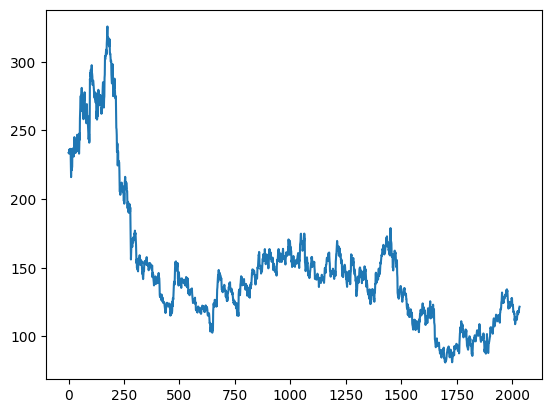

In [16]:
plt.plot(df_close)

In [17]:
#Scaling

In [18]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [20]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [21]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]


In [22]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [28]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
#Creating the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 0.0379 - val_loss: 0.0070
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - loss: 0.0012 - val_loss: 8.7652e-04
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - loss: 9.9071e-04 - val_loss: 9.1509e-04
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - loss: 9.7359e-04 - val_loss: 0.0011
Epoch 12/100
23/23 ━━━━

In [83]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [84]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [85]:
#performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

162.54864490297768

In [86]:
math.sqrt(mean_squared_error(y_test, test_predict))

105.76606520255362

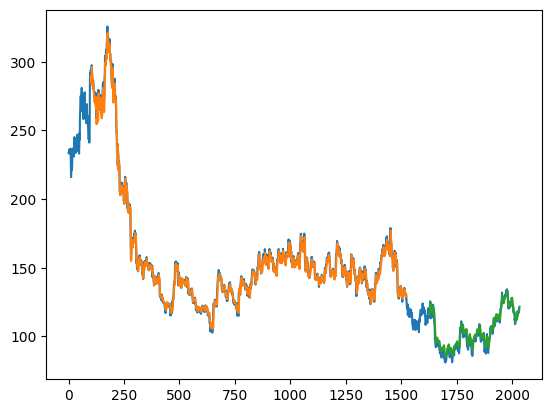

In [87]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
#Prediction

In [88]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [90]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [91]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [92]:
lst_output = []
n_steps = 100
nextNumberOfDays = 30
i = 0

while i < nextNumberOfDays:
    if len(temp_input) > n_steps:
        temp_input = temp_input[-n_steps:]

    x_input = np.array(temp_input).reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))

    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])

    i += 1

print(lst_output)


0 day output [[0.16578431]]
1 day output [[0.16729821]]
2 day output [[0.16805823]]
3 day output [[0.16854446]]
4 day output [[0.16890197]]
5 day output [[0.1691998]]
6 day output [[0.16948308]]
7 day output [[0.16977882]]
8 day output [[0.17009886]]
9 day output [[0.17044447]]
10 day output [[0.17081048]]
11 day output [[0.17118904]]
12 day output [[0.17157176]]
13 day output [[0.17195177]]
14 day output [[0.17232402]]
15 day output [[0.1726858]]
16 day output [[0.17303617]]
17 day output [[0.17337586]]
18 day output [[0.1737063]]
19 day output [[0.17402951]]
20 day output [[0.17434743]]
21 day output [[0.17466179]]
22 day output [[0.17497379]]
23 day output [[0.17528431]]
24 day output [[0.17559363]]
25 day output [[0.17590173]]
26 day output [[0.17620815]]
27 day output [[0.17651246]]
28 day output [[0.17681393]]
29 day output [[0.17711188]]
[0.16578431, 0.16729821, 0.16805823, 0.16854446, 0.16890197, 0.1691998, 0.16948308, 0.16977882, 0.17009886, 0.17044447, 0.17081048, 0.17118904,

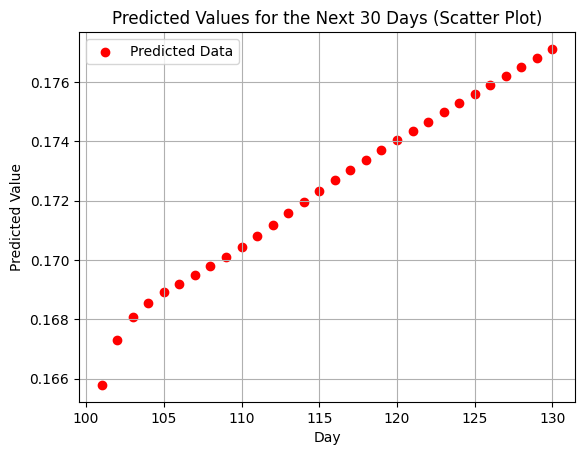

In [94]:
import numpy as np
import matplotlib.pyplot as plt


day_pred = np.arange(n_steps + 1, n_steps + nextNumberOfDays + 1)  # Days 101 to 130

plt.scatter(day_pred, lst_output, label="Predicted Data", color='red')
plt.xlabel("Day")
plt.ylabel("Predicted Value")
plt.title("Predicted Values for the Next 30 Days (Scatter Plot)")
plt.legend()
plt.grid(True)
plt.show()
